In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Admin/Downloads/Dataset .csv")

In [3]:
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
# Table Booking
table_booking_pct = df['Has Table booking'].value_counts(normalize=True) * 100
print("\nPercentage of restaurants offering table booking:")
print(table_booking_pct)


Percentage of restaurants offering table booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


In [5]:
# Online Delivery
online_delivery_pct = df['Has Online delivery'].value_counts(normalize=True) * 100
print("\nPercentage of restaurants offering online delivery:")
print(online_delivery_pct)


Percentage of restaurants offering online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


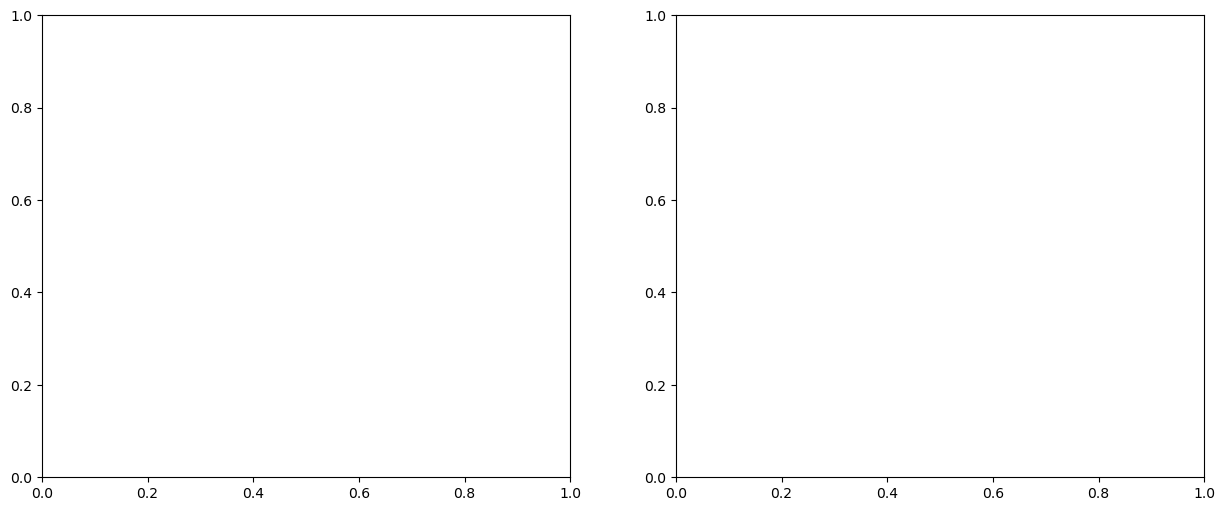

In [6]:
# Visualize the percentages
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

In [7]:
table_booking_pct.plot(kind='pie', autopct='%1.1f%%', ax=ax1, startangle=90)
ax1.set_title('Restaurants Offering Table Booking')
ax1.set_ylabel('')

Text(4.444444444444452, 0.5, '')

In [8]:
online_delivery_pct.plot(kind='pie', autopct='%1.1f%%', ax=ax2, startangle=90)
ax2.set_title('Restaurants Offering Online Delivery')
ax2.set_ylabel('')

Text(638.5353535353535, 0.5, '')

In [9]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


Average ratings by table booking availability:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


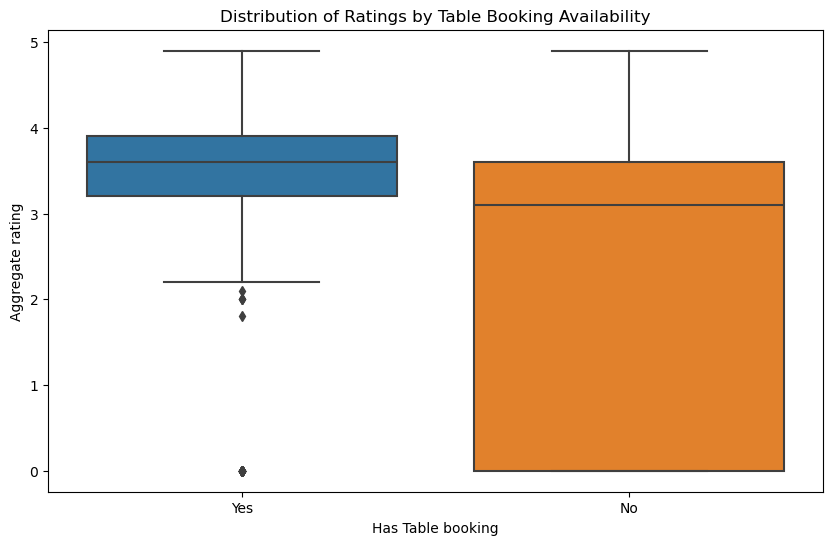

In [10]:
# 2. Compare the average ratings of restaurants with table booking and those without

avg_rating_by_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage ratings by table booking availability:")
print(avg_rating_by_booking)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title('Distribution of Ratings by Table Booking Availability')
plt.show()

In [11]:
# Perform t-test to check if the difference is statistically significant
from scipy import stats

booking_yes = df[df['Has Table booking'] == 'Yes']['Aggregate rating']
booking_no = df[df['Has Table booking'] == 'No']['Aggregate rating']

t_stat, p_value = stats.ttest_ind(booking_yes, booking_no)
print(f"\nt-statistic: {t_stat}")
print(f"p-value: {p_value}")



t-statistic: 18.910847884366657
p-value: 2.4808519133657926e-78



Online delivery availability by price range:
Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444


<Figure size 1200x600 with 0 Axes>

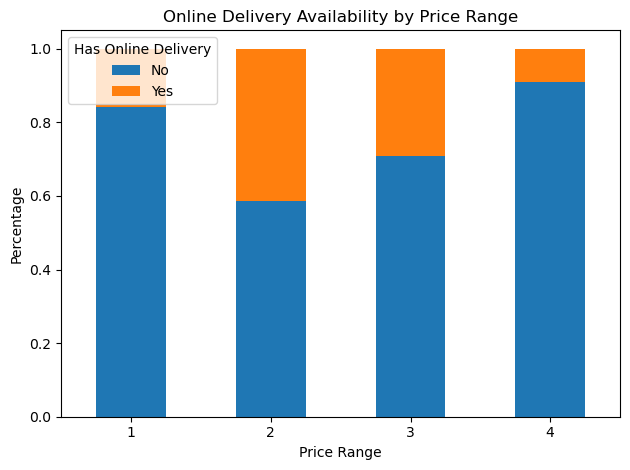

In [12]:
# 3. Analyze the availability of online delivery among restaurants with different price ranges

delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
print("\nOnline delivery availability by price range:")
print(delivery_by_price)

plt.figure(figsize=(12, 6))
delivery_by_price.plot(kind='bar', stacked=True)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Has Online Delivery')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [1]:
#Task2 Level2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/Admin/Downloads/Dataset .csv")

In [5]:
# 1. Determine the most common price range among all the restaurants
price_range_counts = df['Price range'].value_counts()
most_common_price_range = price_range_counts.index[0]

In [6]:
print("Price range distribution:")
print(price_range_counts)
print(f"\nMost common price range: {most_common_price_range}")

Price range distribution:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Most common price range: 1


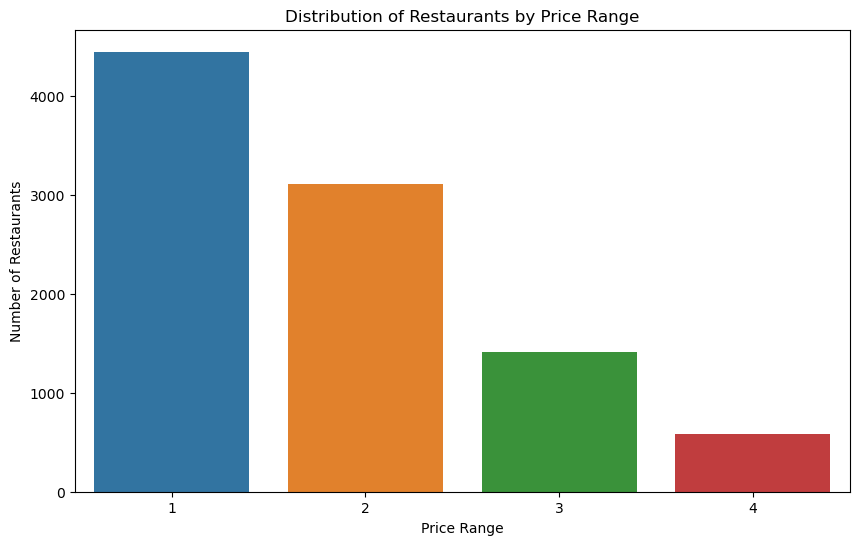

In [7]:
# Visualize price range distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

In [8]:
# 2. Calculate the average rating for each price range
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().sort_values(ascending=False)

print("\nAverage rating for each price range:")
print(avg_rating_by_price)


Average rating for each price range:
Price range
4    3.817918
3    3.683381
2    2.941054
1    1.999887
Name: Aggregate rating, dtype: float64


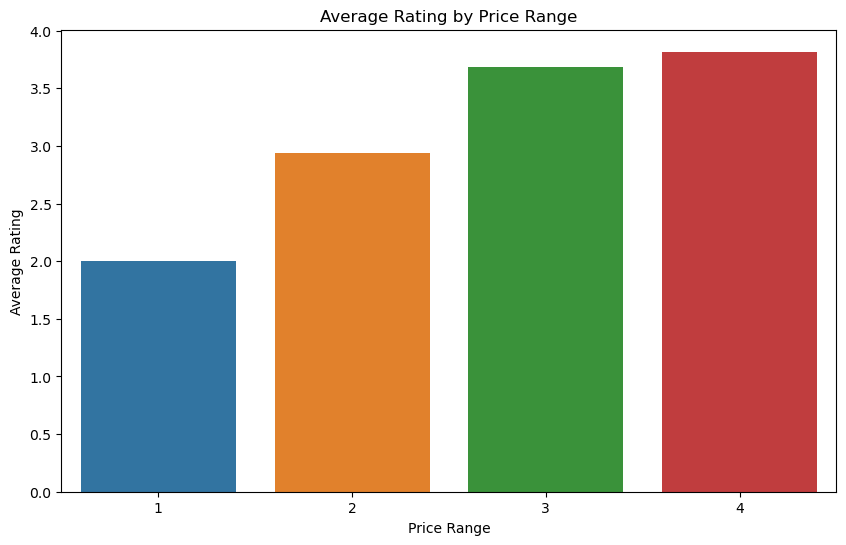

In [9]:
# Visualize average ratings by price range
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

In [10]:
# 3. Identify the color that represents the highest average rating among different price ranges
avg_rating_by_color = df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)
color_highest_rating = avg_rating_by_color.index[0]

print("\nAverage rating for each color:")
print(avg_rating_by_color)
print(f"\nColor representing the highest average rating: {color_highest_rating}")


Average rating for each color:
Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64

Color representing the highest average rating: Dark Green


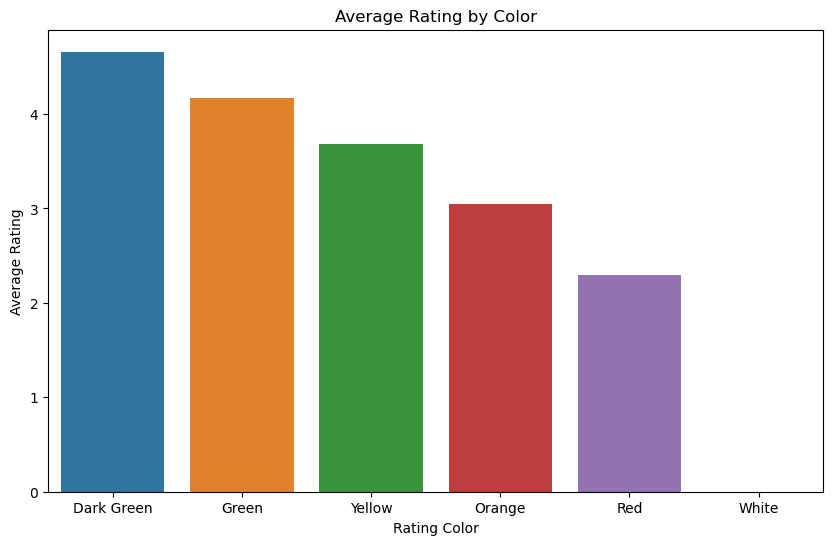

In [11]:
# Visualize average ratings by color
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_color.index, y=avg_rating_by_color.values)
plt.title('Average Rating by Color')
plt.xlabel('Rating Color')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your CSV file
df = pd.read_csv('your_dataset.csv')

# Display the first few rows and data info to verify the loading
print(df.head())
print(df.info())

# 1. Extract additional features from existing columns

# Length of restaurant name
df['Name_Length'] = df['Restaurant Name'].str.len()

# Length of address
df['Address_Length'] = df['Address'].str.len()

# Number of cuisines
df['Cuisine_Count'] = df['Cuisines'].str.count(',') + 1

# Extract city from address (assuming city is the last word in the address)
df['City'] = df['Address'].str.split().str[-1]

# 2. Create new features by encoding categorical variables

# Has Table Booking
df['Has_Table_Booking'] = (df['Has Table booking'] == 'Yes').astype(int)

# Has Online Delivery
df['Has_Online_Delivery'] = (df['Has Online delivery'] == 'Yes').astype(int)

# Encode price range as numeric
price_range_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
df['Price_Range_Numeric'] = df['Price range'].map(price_range_map)

# One-hot encoding for Rating color
df = pd.get_dummies(df, columns=['Rating color'], prefix='Color')

# Display the new features
print("\nNew features added:")
print(df[['Name_Length', 'Address_Length', 'Cuisine_Count', 'City', 
          'Has_Table_Booking', 'Has_Online_Delivery', 'Price_Range_Numeric', 
          'Color_Dark Green', 'Color_Green', 'Color_Yellow', 'Color_Orange', 'Color_Red']].head())

# Basic statistics of new numerical features
print("\nStatistics of new numerical features:")
print(df[['Name_Length', 'Address_Length', 'Cuisine_Count', 'Price_Range_Numeric']].describe())

# Correlation matrix of numerical features
correlation_matrix = df[['Aggregate rating', 'Name_Length', 'Address_Length', 'Cuisine_Count', 
                         'Has_Table_Booking', 'Has_Online_Delivery', 'Price_Range_Numeric']].corr()

print("\nCorrelation matrix of numerical features:")
print(correlation_matrix)

# Optionally, visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [12]:
#Task2 Level :3

In [13]:
import pandas as pd
import numpy as np


In [14]:
df = pd.read_csv("C:/Users/Admin/Downloads/Dataset .csv")

In [15]:
# Display the first few rows and data info to verify the loading
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [16]:
# 1. Extract additional features from existing columns

# Length of restaurant name
df['Name_Length'] = df['Restaurant Name'].str.len()

# Length of address
df['Address_Length'] = df['Address'].str.len()

# Number of cuisines
df['Cuisine_Count'] = df['Cuisines'].str.count(',') + 1

# Extract city from address (assuming city is the last word in the address)
df['City'] = df['Address'].str.split().str[-1]

In [17]:
# 2. Create new features by encoding categorical variables

# Has Table Booking
df['Has_Table_Booking'] = (df['Has Table booking'] == 'Yes').astype(int)

# Has Online Delivery
df['Has_Online_Delivery'] = (df['Has Online delivery'] == 'Yes').astype(int)

# Encode price range as numeric
price_range_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
df['Price_Range_Numeric'] = df['Price range'].map(price_range_map)

# One-hot encoding for Rating color
df = pd.get_dummies(df, columns=['Rating color'], prefix='Color')

In [18]:
# Display the new features
print("\nNew features added:")
print(df[['Name_Length', 'Address_Length', 'Cuisine_Count', 'City', 
          'Has_Table_Booking', 'Has_Online_Delivery', 'Price_Range_Numeric', 
          'Color_Dark Green', 'Color_Green', 'Color_Yellow', 'Color_Orange', 'Color_Red']].head())

# Basic statistics of new numerical features
print("\nStatistics of new numerical features:")
print(df[['Name_Length', 'Address_Length', 'Cuisine_Count', 'Price_Range_Numeric']].describe())


New features added:
   Name_Length  Address_Length  Cuisine_Count  City  Has_Table_Booking  \
0           16              71            3.0  City                  1   
1           16              67            1.0  City                  1   
2           22              56            4.0  City                  1   
3            4              70            2.0  City                  0   
4           11              64            2.0  City                  1   

   Has_Online_Delivery  Price_Range_Numeric  Color_Dark Green  Color_Green  \
0                    0                  NaN              True        False   
1                    0                  NaN              True        False   
2                    0                  NaN             False         True   
3                    0                  NaN              True        False   
4                    0                  NaN              True        False   

   Color_Yellow  Color_Orange  Color_Red  
0         False       

In [19]:
# Correlation matrix of numerical features
correlation_matrix = df[['Aggregate rating', 'Name_Length', 'Address_Length', 'Cuisine_Count', 
                         'Has_Table_Booking', 'Has_Online_Delivery', 'Price_Range_Numeric']].corr()

print("\nCorrelation matrix of numerical features:")
print(correlation_matrix)



Correlation matrix of numerical features:
                     Aggregate rating  Name_Length  Address_Length  \
Aggregate rating             1.000000    -0.035178        0.002334   
Name_Length                 -0.035178     1.000000        0.009567   
Address_Length               0.002334     0.009567        1.000000   
Cuisine_Count                0.250316    -0.039505        0.039891   
Has_Table_Booking            0.189998     0.075672        0.064177   
Has_Online_Delivery          0.225699    -0.159614       -0.018362   
Price_Range_Numeric               NaN          NaN             NaN   

                     Cuisine_Count  Has_Table_Booking  Has_Online_Delivery  \
Aggregate rating          0.250316           0.189998             0.225699   
Name_Length              -0.039505           0.075672            -0.159614   
Address_Length            0.039891           0.064177            -0.018362   
Cuisine_Count             1.000000           0.222643             0.162051   
Has_Ta

C:\Users\Admin\.anaconda\shreyash\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


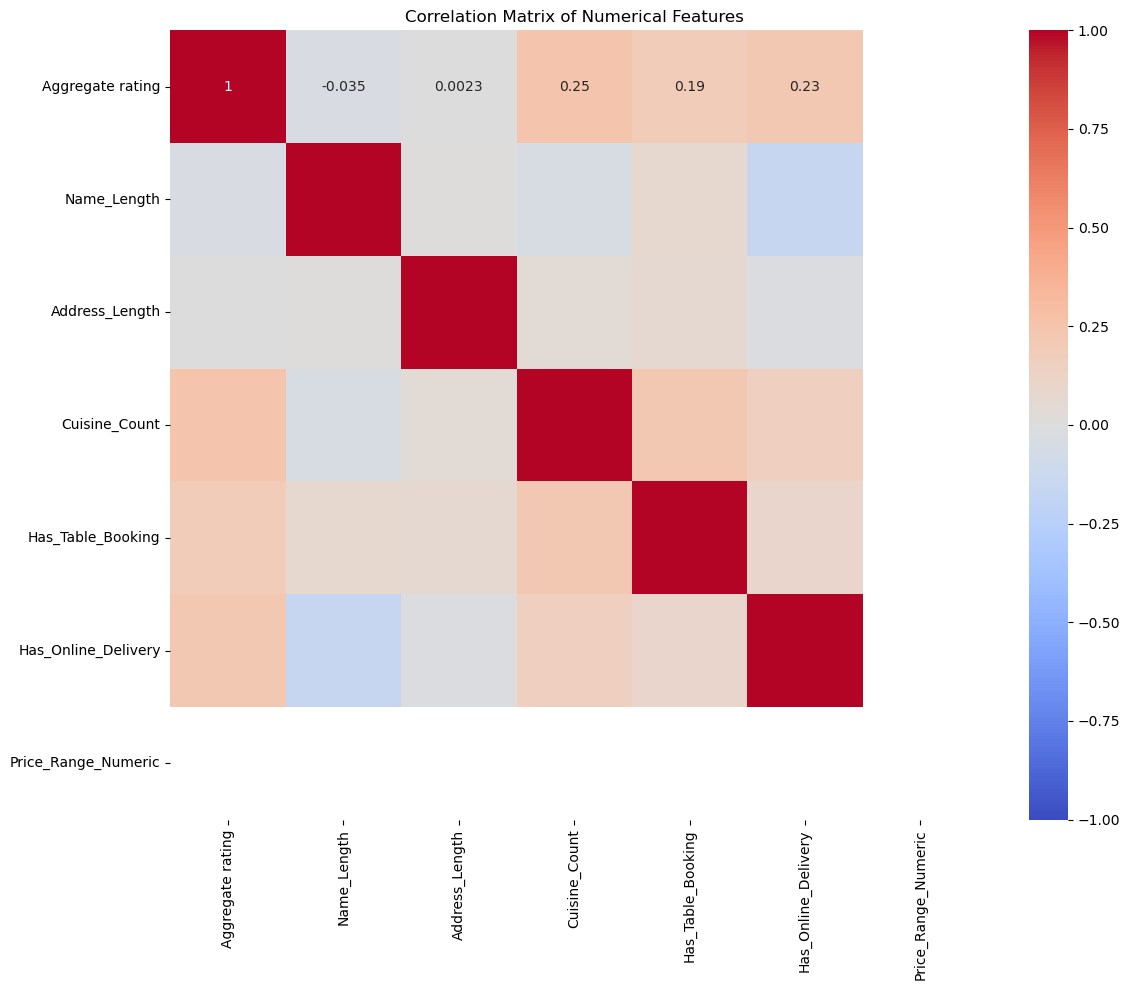

In [20]:
# Optionally, visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()